In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Archivo LES (experimento)

In [2]:
nombres=np.loadtxt('../Datos/Datos_Prueba_2018-02-19_16-45 (1).txt',dtype='U',max_rows=1,skiprows=2,delimiter='\t')
nombres[0]='fecha'
nombres[1]='hora'
nombres[3]='Ti'
nombres[7]='To'
nombres[5]='Tg'
nombres[8]='Tsi_SC'
nombres[9]='Tso_SC'
LES=pd.read_csv('../Datos/Datos_Prueba_2018-02-19_16-45 (1).txt',names=nombres,sep='\t',skiprows=3)
LES.hora = LES.hora.str.replace('p. m.','PM',regex=True)
LES.hora = LES.hora.str.replace('a. m.','AM',regex=True)
LES['time']=LES.fecha+ ' ' +LES.hora
LES.time= pd.to_datetime(LES.time,dayfirst=True)
LES.set_index('time',inplace=True)
del LES['fecha']
del LES['hora']
upsampled     = LES.resample('1Min').pad()
LES= upsampled.interpolate(method='time')
LES=LES.drop(LES.index[0])

### Archivo ener-habitat (usando el programa ener-habitat)

In [3]:
EH = pd.read_csv('../Datos/agaa._1_18_Nu10000_ho13.00.csv',sep='\t')
EH = EH.drop([0], axis=0)
EH['#t']= EH['#t'].str.replace('.17',':10',regex=True)
EH['#t']= EH['#t'].str.replace('.33',':20',regex=True)
EH['#t']= EH['#t'].str.replace('.50',':30',regex=True)
EH['#t']= EH['#t'].str.replace('.67',':40',regex=True)
EH['#t']= EH['#t'].str.replace('.83',':50',regex=True)
EH['#t']= EH['#t'].str.replace('24.00','23:59',regex=True)
EH['#t']= EH['#t'].str.replace('.',':',regex=True)
EH['tiempo']= '2019 02/01' +' '+ EH['#t']
EH['tiempo']
EH['tiempo']= pd.to_datetime(EH['tiempo'])
EH.set_index(EH.tiempo,inplace=True)
EH['Tsa'] = EH.Tsa.astype(float)
EH['Ta'] = EH.Ta.astype(float)
EH['Tparedint'] = EH.Tparedint.astype(float)
EH['Tint'] = EH.Tint.astype(float)
EH['Tsa'] = EH.Tsa.astype(float)

### Archivo IDF (simulacion de LES con condiciones de ener-habitat)

In [9]:
nombres= np.loadtxt('../Datos/nuevo.txt',dtype='U',max_rows=1,delimiter=',')
nombres[0]='tiempo'
nombres[1]='Ti_IDF'
nombres[2]='Ta_IDF'
nombres

archivo = '../Datos/nuevo.txt'
def importa(archivo,nombres):
    IDF= pd.read_csv(archivo,names=nombres,skiprows=1)
    IDF.tiempo= IDF.tiempo.str.replace('24:00:00','23:59:59')
    IDF.tiempo= '2019'+' '+ IDF.tiempo
    IDF.tiempo= pd.to_datetime(IDF.tiempo,format='%Y %m/%d %H:%M:%S')
    start_date = '2019 02/01'
    end_date   = '2019 02/02'
    IDF= IDF.loc[(IDF['tiempo'] > start_date) & (IDF['tiempo'] <= end_date)]
    IDF.set_index(IDF.tiempo,inplace=True)
    upsampled= IDF.resample('1Min').pad()
    IDF= upsampled.interpolate(method='time')
    IDF= upsampled.interpolate(method='time')
    del IDF['tiempo']
    return IDF
IDF = importa('../Datos/nuevo.txt',nombres)

In [10]:
dt=IDF.index-LES.index
LES.index=LES.index+dt

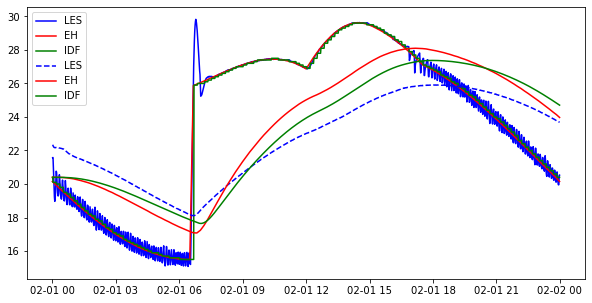

In [13]:
fig, ax = plt.subplots(figsize=(10,5)) 
#plt.ylabel('Temperatura [°C]')
#plt.title("Temperatura sol-aire")

ax.plot(LES.To, 'b', label   = 'LES')
ax.plot(EH.Tsa, 'r', label   = 'EH')
ax.plot(IDF.Ta_IDF, 'g', label   = 'IDF')

ax.plot(LES.Ti, 'b--', label   = 'LES')
ax.plot(EH.Tint, 'r', label   = 'EH')
ax.plot(IDF.Ti_IDF, 'g', label   = 'IDF')

ax.legend()